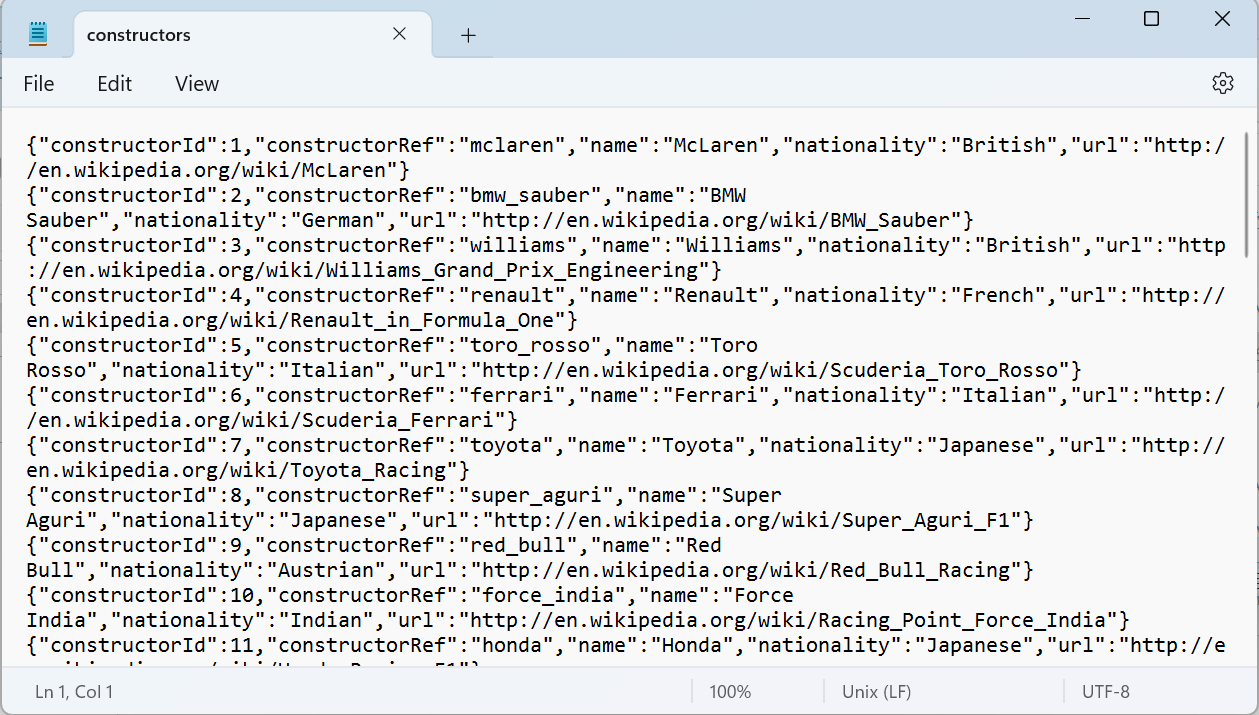

In [2]:
#NOTE: PySpark needs JDK,Hadoop installed in machine
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=2f704adc767e7b5a36886ed9b544e06b3732b7d5489cac79e2ce1d340e2d8637
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [3]:
# Import necessary libraries
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("JSONtoTable").getOrCreate()

print(spark.version) #check the version of Spark


3.4.1


In [4]:
import pyspark #check the version of PySpark
print(pyspark.__version__)

3.4.1


In [5]:
# To check env and path has same java jdk versions cmd echo %JAVA_HOME%
#cmd java -version

#Hadoop 3.3 supports java 11

import subprocess ##check the version of java
version = subprocess.check_output(['java', '-version'], stderr=subprocess.STDOUT)

print (version)

b'openjdk version "11.0.20.1" 2023-08-24\nOpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04)\nOpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)\n'


In [14]:
from pyspark import SparkContext

# Create a SparkContext object
spark_context = SparkContext.getOrCreate()

# Get the Hadoop version
hadoop_version = spark_context.version
print("Hadoop version:", hadoop_version)

Hadoop version: 3.4.1


In [6]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
url = '/content/drive/MyDrive/Colab Notebooks/constructors.json'
json_df = spark.read.json(url)

# Show the DataFrame
json_df.show()

+-------------+--------------+-----------+-----------+--------------------+
|constructorId|constructorRef|       name|nationality|                 url|
+-------------+--------------+-----------+-----------+--------------------+
|            1|       mclaren|    McLaren|    British|http://en.wikiped...|
|            2|    bmw_sauber| BMW Sauber|     German|http://en.wikiped...|
|            3|      williams|   Williams|    British|http://en.wikiped...|
|            4|       renault|    Renault|     French|http://en.wikiped...|
|            5|    toro_rosso| Toro Rosso|    Italian|http://en.wikiped...|
|            6|       ferrari|    Ferrari|    Italian|http://en.wikiped...|
|            7|        toyota|     Toyota|   Japanese|http://en.wikiped...|
|            8|   super_aguri|Super Aguri|   Japanese|http://en.wikiped...|
|            9|      red_bull|   Red Bull|   Austrian|http://en.wikiped...|
|           10|   force_india|Force India|     Indian|http://en.wikiped...|
|           

In [10]:
#csv stores in row format not suitable for big data. Parquet stores in columnar format.
#Saving JSON file to parquet
json_df.write.parquet('/content/drive/MyDrive/Colab Notebooks/converted.parquet')

In [11]:
import pandas as pd
pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/converted.parquet', engine='pyarrow')

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
